In [1]:
from catboost import CatBoostClassifier, Pool
import csv
import pandas as pd
import numpy as np
import seaborn as  sns 


In [2]:
df_learning = pd.DataFrame(pd.read_csv('/home/iefode/Documents/test/out_learning.csv'))
df_learning = df_learning.drop_duplicates()

df_learning

,name,country,hours,minutes,weekday,ip.src,ip.dst,ip.src_host,ip.dst_host,tcp.srcport,tcp.dstport
0,Olga,Russia,13,54,4,173.194.222.196,172.20.10.8,wide-plus.l.google.com,172.20.10.8,443,55910
1,Olga,Russia,14,14,2,172.20.10.8,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,64019,443
2,Olga,Russia,11,18,2,172.20.10.8,151.101.85.63,172.20.10.8,dualstack.r.ssl.global.fastly.net,60860,443
3,Olga,Russia,14,13,2,172.20.10.8,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,64019,443
4,Olga,Russia,15,46,0,23.111.102.40,172.20.10.8,p-rumo00.kxcdn.com,172.20.10.8,443,59921
5,Olga,Russia,15,56,0,91.189.88.24,172.20.10.8,archive.ubuntu.com,172.20.10.8,80,60048
6,Olga,Russia,11,25,2,8.247.253.254,172.20.10.8,auto.au.download.windowsupdate.com.c.footprint...,172.20.10.8,80,60434
7,Olga,Russia,15,55,0,91.189.88.24,172.20.10.8,archive.ubuntu.com,172.20.10.8,80,60048
9,Olga,Russia,14,13,2,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,172.20.10.8,443,64019
10,Olga,Russia,13,54,2,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,172.20.10.8,443,64019


In [3]:
df_validation = pd.DataFrame(pd.read_csv('/home/iefode/Documents/test/out_validation.csv'))
df_validation = df_validation.drop_duplicates()
df_validation

,name,country,hours,minutes,weekday,ip.src,ip.dst,ip.src_host,ip.dst_host,tcp.srcport,tcp.dstport
0,Olga,Russia,10,23,1,185.40.154.13,192.168.3.40,user20442.clients-cdnnow.ru,192.168.3.40,443,51112
1,Olga,Russia,11,19,2,172.20.10.8,151.101.85.63,172.20.10.8,dualstack.r.ssl.global.fastly.net,60860,443
2,Olga,Russia,10,17,1,195.2.67.180,192.168.3.40,srcipt.ru,192.168.3.40,80,50756
3,Olga,Russia,7,27,2,172.20.10.8,178.154.131.217,172.20.10.8,yastatic.net,52440,443
4,Olga,Russia,11,17,2,172.20.10.8,151.101.85.63,172.20.10.8,dualstack.r.ssl.global.fastly.net,60860,443
5,Olga,Russia,7,27,2,136.243.37.177,172.20.10.8,cdn.lifehacker.ru,172.20.10.8,443,52377
6,Olga,Russia,15,47,0,91.189.88.174,172.20.10.8,archive.ubuntu.com,172.20.10.8,80,59939
7,Olga,Russia,14,11,2,172.20.10.8,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,64019,443
8,Olga,Russia,23,7,2,77.88.21.179,172.20.10.8,adfox-external-l3-engine.stable.qloud-b.yandex...,172.20.10.8,443,65451
9,Olga,Russia,13,55,2,104.78.36.179,172.20.10.8,e19210.b.akamaiedge.net,172.20.10.8,443,64088


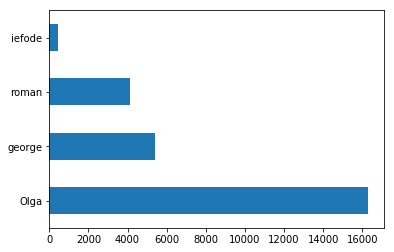

In [4]:
import matplotlib.pyplot as plt
df_learning_1 = pd.DataFrame(pd.read_csv('/home/iefode/Documents/test/out_learning.csv'))
df_learning_1 = df_learning_1.drop_duplicates()
df_learning_1['name'].value_counts().plot.barh()
plt.show()

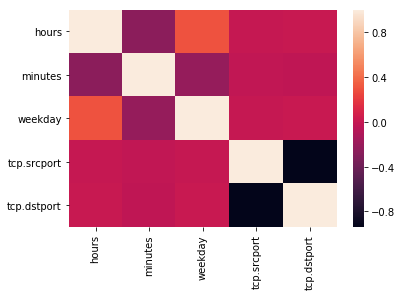

In [5]:
cl = df_learning_1.corr()
sns.heatmap(cl, 
            xticklabels=cl.columns.values,
            yticklabels=cl.columns.values)

In [6]:
names_learning = df_learning['name']
df_learning = df_learning.drop(axis=1, labels='name')
df_learning

,country,hours,minutes,weekday,ip.src,ip.dst,ip.src_host,ip.dst_host,tcp.srcport,tcp.dstport
0,Russia,13,54,4,173.194.222.196,172.20.10.8,wide-plus.l.google.com,172.20.10.8,443,55910
1,Russia,14,14,2,172.20.10.8,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,64019,443
2,Russia,11,18,2,172.20.10.8,151.101.85.63,172.20.10.8,dualstack.r.ssl.global.fastly.net,60860,443
3,Russia,14,13,2,172.20.10.8,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,64019,443
4,Russia,15,46,0,23.111.102.40,172.20.10.8,p-rumo00.kxcdn.com,172.20.10.8,443,59921
5,Russia,15,56,0,91.189.88.24,172.20.10.8,archive.ubuntu.com,172.20.10.8,80,60048
6,Russia,11,25,2,8.247.253.254,172.20.10.8,auto.au.download.windowsupdate.com.c.footprint...,172.20.10.8,80,60434
7,Russia,15,55,0,91.189.88.24,172.20.10.8,archive.ubuntu.com,172.20.10.8,80,60048
9,Russia,14,13,2,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,172.20.10.8,443,64019
10,Russia,13,54,2,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,172.20.10.8,443,64019


In [7]:
names_validation = df_validation['name']
df_validation = df_validation.drop(axis=1, labels='name')
df_validation

,country,hours,minutes,weekday,ip.src,ip.dst,ip.src_host,ip.dst_host,tcp.srcport,tcp.dstport
0,Russia,10,23,1,185.40.154.13,192.168.3.40,user20442.clients-cdnnow.ru,192.168.3.40,443,51112
1,Russia,11,19,2,172.20.10.8,151.101.85.63,172.20.10.8,dualstack.r.ssl.global.fastly.net,60860,443
2,Russia,10,17,1,195.2.67.180,192.168.3.40,srcipt.ru,192.168.3.40,80,50756
3,Russia,7,27,2,172.20.10.8,178.154.131.217,172.20.10.8,yastatic.net,52440,443
4,Russia,11,17,2,172.20.10.8,151.101.85.63,172.20.10.8,dualstack.r.ssl.global.fastly.net,60860,443
5,Russia,7,27,2,136.243.37.177,172.20.10.8,cdn.lifehacker.ru,172.20.10.8,443,52377
6,Russia,15,47,0,91.189.88.174,172.20.10.8,archive.ubuntu.com,172.20.10.8,80,59939
7,Russia,14,11,2,172.20.10.8,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,64019,443
8,Russia,23,7,2,77.88.21.179,172.20.10.8,adfox-external-l3-engine.stable.qloud-b.yandex...,172.20.10.8,443,65451
9,Russia,13,55,2,104.78.36.179,172.20.10.8,e19210.b.akamaiedge.net,172.20.10.8,443,64088


In [8]:
from catboost import Pool, CatBoostClassifier

train_data = df_learning
eval_data = df_validation

column_description = [
    "country",
    "hours",
    "minutes",
    "weekday",
    "ip.src",
    "ip.dst",
    "ip.src_host",
    "ip.dst_host",
    "tcp.srcport",
    "tcp.dstport"
]


train_label = names_learning
eval_label = names_validation


train_dataset = Pool(data=train_data,
                     label=train_label,
                     cat_features=column_description)

eval_dataset = Pool(data=eval_data,
                    label=eval_label,
                    cat_features=column_description)


# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=150,
                           learning_rate=0.1,
                           depth=16,
                           one_hot_max_size=100,
                           loss_function='MultiClass')

model.fit(train_dataset,
          use_best_model=True,
          eval_set=eval_dataset)

# Get predicted classes
preds_class = model.predict(eval_dataset)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(eval_dataset)
# Get predicted RawFormulaVal
preds_raw = model.predict(eval_dataset, 
                          prediction_type='RawFormulaVal')

0:	learn: 1.1201049	test: 1.1154156	best: 1.1154156 (0)	total: 1.05s	remaining: 2m 35s
1:	learn: 0.9391795	test: 0.9307721	best: 0.9307721 (1)	total: 2.01s	remaining: 2m 29s
2:	learn: 0.8030236	test: 0.7923369	best: 0.7923369 (2)	total: 3s	remaining: 2m 26s
3:	learn: 0.6928514	test: 0.6816028	best: 0.6816028 (3)	total: 3.1s	remaining: 1m 53s
4:	learn: 0.6039253	test: 0.5927253	best: 0.5927253 (4)	total: 4.11s	remaining: 1m 59s
5:	learn: 0.5318277	test: 0.5201430	best: 0.5201430 (5)	total: 5.12s	remaining: 2m 2s
6:	learn: 0.4701916	test: 0.4582671	best: 0.4582671 (6)	total: 6.14s	remaining: 2m 5s
7:	learn: 0.4193394	test: 0.4066336	best: 0.4066336 (7)	total: 6.17s	remaining: 1m 49s
8:	learn: 0.3739817	test: 0.3612674	best: 0.3612674 (8)	total: 6.19s	remaining: 1m 36s
9:	learn: 0.3363394	test: 0.3234111	best: 0.3234111 (9)	total: 6.25s	remaining: 1m 27s
10:	learn: 0.3030850	test: 0.2899877	best: 0.2899877 (10)	total: 7.28s	remaining: 1m 32s
11:	learn: 0.2724496	test: 0.2598412	best: 0.25

93:	learn: 0.0032954	test: 0.0024639	best: 0.0024639 (93)	total: 1m 32s	remaining: 54.8s
94:	learn: 0.0032332	test: 0.0024169	best: 0.0024169 (94)	total: 1m 33s	remaining: 53.9s
95:	learn: 0.0031827	test: 0.0023780	best: 0.0023780 (95)	total: 1m 34s	remaining: 53s
96:	learn: 0.0031196	test: 0.0023300	best: 0.0023300 (96)	total: 1m 35s	remaining: 52.1s
97:	learn: 0.0030749	test: 0.0022931	best: 0.0022931 (97)	total: 1m 36s	remaining: 51.2s
98:	learn: 0.0030256	test: 0.0022546	best: 0.0022546 (98)	total: 1m 37s	remaining: 50.3s
99:	learn: 0.0029721	test: 0.0022149	best: 0.0022149 (99)	total: 1m 38s	remaining: 49.4s
100:	learn: 0.0029282	test: 0.0021816	best: 0.0021816 (100)	total: 1m 39s	remaining: 48.5s
101:	learn: 0.0028818	test: 0.0021493	best: 0.0021493 (101)	total: 1m 41s	remaining: 47.6s
102:	learn: 0.0028362	test: 0.0021135	best: 0.0021135 (102)	total: 1m 42s	remaining: 46.6s
103:	learn: 0.0027900	test: 0.0020759	best: 0.0020759 (103)	total: 1m 43s	remaining: 45.7s
104:	learn: 0.0

In [13]:
model.save_model(fname="/home/iefode/Documents/model.onnx", format="onnx")

CatBoostError: catboost/libs/model/model_export/model_exporter.cpp:94: ONNX-ML format export does yet not support categorical features

In [9]:
df_real = pd.DataFrame(pd.read_csv('/home/iefode/Documents/test/out_real.csv'))
df_real = df_real.drop_duplicates()
df_real

,name,country,hours,minutes,weekday,ip.src,ip.dst,ip.src_host,ip.dst_host,tcp.srcport,tcp.dstport
0,Olga,Russia,10,21,1,185.40.154.13,192.168.3.40,user20442.clients-cdnnow.ru,192.168.3.40,443,50996
1,Olga,Russia,15,29,0,172.20.10.8,13.227.198.44,172.20.10.8,basemaps.arcgis.com,59858,443
2,Olga,Russia,15,56,0,91.189.88.24,172.20.10.8,archive.ubuntu.com,172.20.10.8,80,60048
3,Olga,Russia,14,14,2,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,172.20.10.8,443,64019
4,Olga,Russia,10,23,1,192.168.3.40,185.40.154.13,192.168.3.40,user20442.clients-cdnnow.ru,51112,443
5,Olga,Russia,13,56,2,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,172.20.10.8,443,64019
6,Olga,Russia,23,14,3,13.107.4.50,172.20.10.8,c-0001.c-msedge.net,172.20.10.8,80,53513
7,Olga,Russia,23,6,2,63.140.45.8,172.20.10.8,asoscomltd.tt.omtrdc.net,172.20.10.8,443,50965
8,Olga,Russia,14,8,4,81.27.251.36,172.20.10.8,ext-strm-rascom03.strm.yandex.net,172.20.10.8,443,56250
9,Olga,Russia,7,24,2,172.20.10.8,87.236.19.234,172.20.10.8,1gai.ru,52287,443


In [10]:
names_real = df_real['name']
df_real = df_real.drop(axis=1, labels='name')


real_dataset = Pool(data=df_real,
                    label=names_real,
                    cat_features=column_description)

In [11]:
accuracy = model.score(train_dataset)
accuracy

1.0

In [12]:
accuracy = model.score(real_dataset)
accuracy

1.0

In [15]:
print(column_description)
print(model.feature_importances_)

['country', 'hours', 'minutes', 'weekday', 'ip.src', 'ip.dst', 'ip.src_host', 'ip.dst_host', 'tcp.srcport', 'tcp.dstport']
[ 0.         34.78608355  2.00342759 28.08981043  0.          2.19514561
 22.71039947 10.00256268  0.          0.21257066]


In [18]:
print(model.eval_metrics(train_dataset, 'Precision', eval_period=150))
print(model.eval_metrics(real_dataset, 'Precision', eval_period=150))

{'Precision:class=0': [0.989792198323004, 1.0], 'Precision:class=1': [0.9979213907785336, 1.0], 'Precision:class=2': [1.0, 1.0], 'Precision:class=3': [0.9946183953033269, 1.0]}


In [22]:
print(model.eval_metrics(train_dataset, 'F1', eval_period=150))
print(model.eval_metrics(real_dataset, 'F1', eval_period=150))

{'F1:class=0': [0.9944447835907454, 1.0], 'F1:class=1': [0.9893218433870364, 1.0], 'F1:class=2': [1.0, 1.0], 'F1:class=3': [0.9871327992231125, 1.0]}
{'F1:class=0': [0.994949494949495, 1.0], 'F1:class=1': [0.9929676511954992, 1.0], 'F1:class=2': [1.0, 1.0], 'F1:class=3': [0.9891936824605154, 1.0]}


In [23]:
print(model.eval_metrics(train_dataset, 'TotalF1', eval_period=150))
print(model.eval_metrics(real_dataset, 'TotalF1', eval_period=150))

{'TotalF1': [0.9923284594354835, 1.0]}
{'TotalF1': [0.9937358559224553, 1.0]}


In [24]:
print(model.eval_metrics(train_dataset, 'Recall', eval_period=150))
print(model.eval_metrics(real_dataset, 'Recall', eval_period=150))

{'Recall:class=0': [0.9991413150147204, 1.0], 'Recall:class=1': [0.9808692421991084, 1.0], 'Recall:class=2': [1.0, 1.0], 'Recall:class=3': [0.9797590361445783, 1.0]}
{'Recall:class=0': [0.9989858012170385, 1.0], 'Recall:class=1': [0.9874125874125874, 1.0], 'Recall:class=2': [1.0, 1.0], 'Recall:class=3': [0.9826589595375722, 1.0]}


In [25]:
print(model.eval_metrics(train_dataset, 'AUC', eval_period=150))
print(model.eval_metrics(real_dataset, 'AUC', eval_period=150))

{'AUC:type=Mu': [0.9996791649810685, 1.0]}
{'AUC:type=Mu': [0.9998165860306933, 1.0]}


In [40]:
statistic = model.get_evals_result()
statistic

{'learn': {'MultiClass': [1.1201048531156956,
   0.939179503680478,
   0.8030235690677779,
   0.6928514318416497,
   0.6039252655945513,
   0.5318277394706613,
   0.4701916225783508,
   0.4193393695693165,
   0.3739816926229254,
   0.3363393548544051,
   0.3030849696736349,
   0.2724496184853538,
   0.24590949093871292,
   0.2220825971121463,
   0.20065865036940328,
   0.18169072713343754,
   0.16417442219728998,
   0.14844890448808507,
   0.13447175066094258,
   0.12197155761593356,
   0.110685705951103,
   0.10098582330151937,
   0.0921878231862524,
   0.08421611082523241,
   0.0769676291651425,
   0.07054202638832066,
   0.06466167491274345,
   0.059405236648128024,
   0.05458354084036658,
   0.05031496619025625,
   0.04634019666117589,
   0.04277893952316013,
   0.0395609353726298,
   0.03674394173973748,
   0.034097613879707674,
   0.03170821804731266,
   0.02952157911790318,
   0.027480523650368432,
   0.025694604899195953,
   0.023904591724378824,
   0.02245290274393959,
   0.02

In [37]:
model.calc_feature_statistics(data=train_data, target=train_label, feature="ip.dst_host", plot=True)

CatBoostError: catboost/private/libs/quantized_pool_analysis/quantized_pool_analysis.cpp:392: Internal CatBoost Error (contact developers for assistance): Binarized statistics supported only for one-hot encoded features. Use one_hot_max_size when training to manage that.